# SetUp Target Server Info

In [26]:
import requests
import json, os

nn_id = 'lstmcrf034'  # put some key value you want to test

url = "{0}:{1}".format(os.environ['HOSTNAME'] , "8000")
print("done")

done


# Net & Version Create

In [27]:
####(1) 네트워크 생성 ####
resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/nnid/' + nn_id + '/',
                     json={
                         "biz_cate": "MES",
                         "biz_sub_cate": "M60",
                         "nn_title" : "test",
                         "nn_desc": "test desc",
                         "use_flag" : "Y",
                         "dir": "purpose?",
                         "config": "N"
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

####(2) 버전 생성 ####
resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/nnid/' + nn_id + '/version/',
                 json={
                     "nn_def_list_info_nn_id": "",
                     "nn_wf_ver_info": "test version info",
                     "condition": "1",
                     "active_flag": "Y"
                 })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))


evaluation result : lstmcrf034
evaluation result : lstmcrf034


# Graph Flow 정의 

In [28]:
# Work Flow 틀을 구성하도로고 지시한다. (정해진 틀을 강제로 생성)
resp = requests.post('http://' + url + '/api/v1/type/wf/target/init/mode/simple/' + nn_id +'/wfver/1/',
                     json={
                         "type": 'bilstmcrf_iob'
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : bilstmcrf_iob


# 데이터 업로드 

In [29]:
return_dict = {}
return_dict['test'] = open('../../data/ner_train.iob', 'rb')

resp = requests.post('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/data_node/',
                     files = return_dict)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : ['1 file upload success']


# 데이터 노드 정의 

In [30]:
# (1) Train Data Node 의 속성을 정의
# 어디서 Source 를 어떻게 가지고 올것인지 파라메터 정의 
resp = requests.put('http://' + url + '/api/v1/type/wf/state/iobdata/src/local/form/iob/prg/source/nnid/'+nn_id+'/ver/1/node/data_node/',
                     json={
                         "type": "local",
                         "source_server": "local",
                         "source_sql": "all",
                     })

# 전처리는 어떤 것을 할지 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/iobdata/src/local/form/iob/prg/pre/nnid/'+nn_id+'/ver/1/node/data_node/',
                      json={
                          "preprocess":  "None",
                          "word_embed_model" : "w2v0014"
                      })
# 전처리가 완료된 데이터는 어디에 저장을 할지 
resp = requests.put('http://' + url + '/api/v1/type/wf/state/iobdata/src/local/form/iob/prg/store/nnid/'+nn_id+'/ver/1/node/data_node/',)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : /hoya_str_root/lstmcrf034/1/data_node


# 데이터 Feeder 정의

In [31]:
# (2) Network 에 데이터를 Feed하는 Node 의 속성을 정의 
resp = requests.post('http://' + url + '/api/v1/type/wf/state/pre/detail/feed/src/iob/net/bilstmcrf/nnid/'+nn_id+'/ver/1/node/pre_feed_train/',
                     json={
                         "seperator" : " ",
                         "col_len" : 2,
                         "word_embed_id" : "",
                         "char_embed_id":  "",
                         "language" : 'kor'
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : {'char_embed_id': '', 'language': 'kor', 'seperator': ' ', 'col_len': 2, 'word_embed_id': ''}


# Bi-Lstm crf 모델 정의
    - lowercase : 영문의 경우 소문자 변환 옵션 사용여부 (Boolean) 
    - max_iter : 최대 반복 횟수 지정 (무제한 인경우 None)
    - crf : CRF Layer 사용 여부 (Boolean)
    - chars : Char 단위 Bi LSTM 로직 사용 여부 (Boolean)
    - dim : Word Embedding Size (Word Embedding Net Work 설정과 일치 해야 함) 
    - dim_char : Char Embedding Size (Default 로 120으로 설정, 별도 Embedding 로직 지정 불가)
    - train_embeddings : Word Embedding Vector 에 대한 훈련 여부 (Defulat False) 
    - nepochs : 훈련 반복 횟수 
    - p_dropout : Drop Out Percentage (0  ~ 1)
    - batch_size : 한번에 훈련에 사용할 데이터 수 
    - p_lr : Learning Rate 
    - lr_decay : Learning Rate 를 동적으로 조정하는 비율 
    - nepoch_no_imprv : Early Stopping 판단 기준 
    - hidden_size : Word 단위 Bi LSTM 구성시 Cell 의 Matrix Size 
    - char_hidden_size : Char 단위 Bi LSTM 구성시 Cell 의 Matrix Size 

In [32]:
resp = requests.put('http://' + url + '/api/v1/type/wf/state/netconf/detail/bilstmcrf/nnid/' + nn_id + '/ver/1/node/netconf_node/',
                     json={
                        "lowercase" : True,
                        "max_iter" : None,
                        "crf" : True,
                        "chars" : True,
                        "dim" : 300,
                        "dim_char" : 160,
                        "train_embeddings" : False,
                        "nepochs" : 5,
                        "p_dropout" : 0.5,
                        "batch_size" : 50,
                        "p_lr" : 0.001,
                        "lr_decay" : 0.9,
                        "nepoch_no_imprv" : 3,
                        "hidden_size" : 300,
                        "char_hidden_size" : 100
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : {'dim_char': 160, 'nepoch_no_imprv': 3, 'p_dropout': 0.5, 'batch_size': 50, 'model_path': '/hoya_model_root/lstmcrf034/1/netconf_node', 'char_hidden_size': 100, 'train_embeddings': False, 'lr_decay': 0.9, 'crf': True, 'chars': True, 'max_iter': None, 'lowercase': True, 'hidden_size': 300, 'dim': 300, 'nepochs': 5, 'p_lr': 0.001}


# Eval Process 

In [33]:
return_dict = {}
return_dict['test'] = open('../../data/ner_train.iob', 'rb')

resp = requests.post('http://' + url + '/api/v1/type/wf/state/iobdata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/test_data_node/',
                     files = return_dict)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

# 데이터 - 소스 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/iobdata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/test_data_node/',
                     json={
                         "type": "local",
                         "source_server": "local",
                         "source_sql": "all",
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

# 데이터 - 전처리 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/iobdata/src/local/form/raw/prg/pre/nnid/'+nn_id+'/ver/1/node/test_data_node/',
                      json={
                          "preprocess":  "None",
                          "word_embed_model" : "w2v0014"
                      })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

# 데이터 - 저장 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/iobdata/src/local/form/raw/prg/store/nnid/'+nn_id+'/ver/1/node/test_data_node/',)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))


# Feeder 정의
resp = requests.post('http://' + url + '/api/v1/type/wf/state/pre/detail/feed/src/iob/net/bilstmcrf/nnid/'+nn_id+'/ver/1/node/pre_feed_test/',
                     json={
                         "seperator" : " ",
                         "col_len" : 2,
                         "word_embed_id" : "",
                         "char_embed_id":  "",
                         "language" : 'kor'
                     })
print("evaluation result : {0}".format(data))

node_name = 'eval_node'
resp = requests.put('http://' + url + '/api/v1/type/wf/state/eval/nnid/'+nn_id+'/ver/1/node/eval_node/',
                    json={
                        "type": "category",
                    })

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : ['1 file upload success']
evaluation result : {'source_path': '/hoya_src_root/lstmcrf034/1/test_data_node', 'source_server': 'local', 'source_type': 'local', 'source_sql': 'all', 'source_parse_type': 'raw'}
evaluation result : None
evaluation result : /hoya_str_root/lstmcrf034/1/test_data_node
evaluation result : /hoya_str_root/lstmcrf034/1/test_data_node
evaluation result : {'type': 'category'}


# Train 

In [34]:
# Run All Workflow
resp = requests.post('http://' + url + '/api/v1/type/runmanager/state/train/nnid/'+nn_id+'/ver/1/')
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : [None, None, [0.45161290322580644], None, None, {'predicts': [[4, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 7, 0, 0], [0, 0, 0, 0, 0], [1, 0, 0, 0, 0]], 'labels': ['TARGET', 'O/', 'PERSON', 'O', 'COMMAND']}]


# Test Result

In [36]:
from IPython.display import display, HTML
import pandas as pd

print('http://' + url + '/api/v1/type/result/nnid/' + nn_id + '/ver/1/')
resp = requests.get('http://' + url + '/api/v1/type/result/nnid/' + nn_id + '/ver/1/')
data = json.loads(resp.json())
x= range(len(data.get('labels')))

y = data.get('labels')
y_y = data.get('predicts')

df = pd.DataFrame(y_y)
df.columns = y

HTML(df.to_html())

http://54b714a1ba6f:8000/api/v1/type/result/nnid/lstmcrf034/ver/1/


,TARGET,O/,PERSON,O,COMMAND
0,4,0,0,0,0
1,0,0,0,0,0
2,0,0,7,0,0
3,0,0,0,0,0
4,1,0,0,0,0


# Test Result Visualize 

http://54b714a1ba6f:8000/api/v1/type/result/nnid/lstmcrf034/ver/1/


<IPython.core.display.Javascript object>


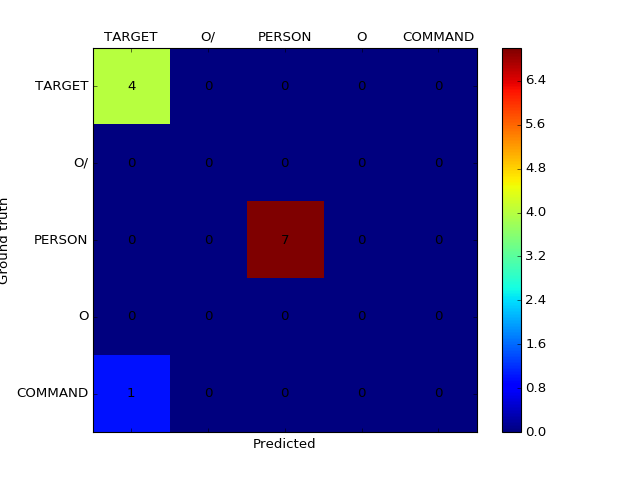

In [37]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import requests
import json, os
import matplotlib.pyplot as plt

print('http://' + url + '/api/v1/type/result/nnid/' + nn_id + '/ver/1/')
resp = requests.get('http://' + url + '/api/v1/type/result/nnid/' + nn_id + '/ver/1/')
data = json.loads(resp.json())

y = data.get('labels')
y_y = data.get('predicts')

df = pd.DataFrame(y_y)
#df = df.transpose()
df.columns = y

labels = y
fig, ax = plt.subplots()
h = ax.matshow(df)
fig.colorbar(h)
for _r in range(len(y)):
    for _c in range(len(y)):
        ax.text(_c, _r, df.values[_r][_c], va='center', ha='center')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

# Predict

In [35]:
resp = requests.post('http://' + url + '/api/v1/type/service/state/predict/type/bilstmcrf/nnid/'+nn_id+'/ver/active/',
                     json={"input_data" : "이태영의 전화번호 검색" , "num": 0, "clean_ans":False}
                     )
data = json.loads(resp.json())
print("evaluation result(2) : {0}".format(data))

evaluation result(2) : ['B-PERSON', 'B-PERSON', 'O']
